<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 인공신경망(Artificial Neural Networks) 과제

## 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [43]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [44]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,0.68791,0.30638,0.40270,0.29693,1.02210,0.60567,1.8777,2.3087,0.44160,0.85937,0.41629,0.36961,0.17894,1.8664,3.6852,1.5372,0.26453,0.31968,0.81387,0.16585,0.45391,3.0376,0.36951,0.45854,0.33534,0.82519,0.57692,0.44810,0.58627,0.39472,0.33957,0.48286,0.29417,0.18215,0.84273,0.19261,1.4431,0.29470,0.35460,1.3391,0.17012,0.15910,0.18885,0.10631,0.14499,0.17667,0.12519,0.11529,0.22804,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,0.69501,0.29905,0.38599,0.28132,0.95668,0.58756,1.7258,2.0430,0.44522,0.83466,0.40036,0.35618,0.17368,1.7610,3.4853,1.5092,0.25573,0.30442,0.78050,0.15719,0.43094,2.9219,0.34228,0.42356,0.32483,0.76172,0.54510,0.42088,0.54510,0.36825,0.32196,0.45452,0.27643,0.18209,0.84761,0.19482,1.4395,0.29406,0.35455,1.3063,0.17143,0.15813,0.18457,0.10659,0.15047,0.17831,0.13428,0.11823,0.23807,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,0.67735,0.29128,0.38100,0.28171,1.00360,0.60245,1.7319,2.0180,0.46767,0.81433,0.39985,0.36809,0.17390,1.7655,3.5715,1.5012,0.25961,0.31175,0.78515,0.16090,0.42319,2.9441,0.34370,0.42500,0.32485,0.75703,0.54362,0.40463,0.55299,0.36388,0.31309,0.44720,0.25665,0.18439,0.85617,0.20074,1.5244,0.30188,0.38609,1.2796,0.18546,0.14870,0.19053,0.10830,0.14533,0.17621,0.13256,0.11776,0.24482,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,0.58328,0.29673,0.37709,0.31383,0.87539,0.52029,1.5669,2.1328,0.47767,0.72770,0.38564,0.36297,0.17945,1.2863,2.9701,1.4197,0.25954,0.27922,0.73449,0.16221,0.41061,2.5002,0.34451,0.42921,0.33012,0.74698,0.54676,0.38686,0.54785,0.36677,0.32849,0.44265,0.39853,0.16177,0.76023,0.18417,1.6124,0.29638,0.29068,1.1988,0.15980,0.16611,0.18532,0.10318,0.14066,0.16380,0.12321,0.11744,0.23495,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,0.55096,0.28696,0.36350,0.27796,0.86491,0.50799,1.4801,2.0137,0.48342,0.68779,0.36753,0.35531,0.17484,1.3247,2.8963,1.3599,0.25070,0.27367,0.70270,0.15483,0.39855,2.4566,0.32913,0.40876,0.31341,0.69196,0.53686,0.36082,0.51282,0.35155,0.31221,0.41909,0.39345,0.16020,0.76811,0.18572,1.6458,0.29683,0.30935,1.2070,0.16465,0.16069,0.18822,0.10478,0.14198,0.16771,0.13684,0.11605,0.25553,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [45]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다.

4-5. F1 score 를 입력합니다. 

In [46]:
import pandas as pd
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [47]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


**타겟값 분포**

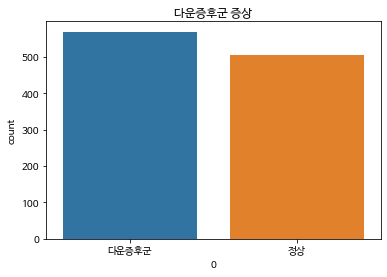

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.countplot(x= df_label[0]);
g.set_title("다운증후군 증상");
g.set_xticklabels(["다운증후군", "정상"]);
plt.rc('font', family='NanumBarunGothic') 

In [49]:
# 텐서플로우 데이터셋으로 만들기 전 string으로 열이름 변경
col = []
for i in df.columns:
  col.append(str(i))
df.columns = col

In [50]:
# 수치형 변수 : 실수값 변형 없이 그대로 전달
feature_columns=[]
for header in col:
  feature_columns.append(tf.feature_column.numeric_column(header))

In [51]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df, df_label,test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,test_size=0.2, random_state=42)


# 딥러닝

In [52]:
# 판다스 데이터프레임 -- > 텐서플로우 데이터셋으로 변형하는 함수
def df_to_dataset(df, df_label,shuffle=True, batch_size=32):
  df = df.copy()
  labels = df_label[0]
  ds = tf.data.Dataset.from_tensor_slices((dict(df),labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df))
  ds = ds.batch(batch_size)
  return ds

In [53]:
train_ds = df_to_dataset(train_x, train_y)
val_ds = df_to_dataset(val_x,val_y, shuffle=False)
test_ds = df_to_dataset(test_x, test_y, shuffle=False)

In [54]:
# 신경망 모델 만들기
model = tf.keras.models.Sequential([
                                    tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1280, activation='relu'),                                    
                                    tf.keras.layers.Dropout(rate=0.2),                                   
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
# 모델 학습
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
22/22 [==============================] - 3s 132ms/step - loss: -10.5428 - accuracy: 0.5131 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 0s 14ms/step - loss: -93.8157 - accuracy: 0.5145 - val_loss: -170.4485 - val_accuracy: 0.5607
Epoch 3/5
22/22 [==============================] - 0s 14ms/step - loss: -419.3208 - accuracy: 0.5145 - val_loss: -636.4479 - val_accuracy: 0.5607
Epoch 4/5
22/22 [==============================] - 0s 13ms/step - loss: -1284.6396 - accuracy: 0.5145 - val_loss: -1730.6917 - val_accuracy: 0.5607
Epoch 5/5
22/22 [==============================] - 0s 14ms/step - loss: -3178.3679 - accuracy: 0.5145 - val_loss: -3860.8545 - val_accuracy: 0.5607


In [56]:
# 정확도 평가
model.evaluate(test_ds)

7/7 [==============================] - 1s 97ms/step - loss: -4390.6090 - accuracy: 0.5509


[-4390.608991350447, 0.5509259]

In [57]:
from sklearn.metrics import classification_report

predictions = model.predict(test_ds)
bin_predictions = tf.round(predictions).numpy().flatten()
print(classification_report(test_y.values, bin_predictions))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71       119
           2       0.00      0.00      0.00        97

    accuracy                           0.55       216
   macro avg       0.28      0.50      0.36       216
weighted avg       0.30      0.55      0.39       216



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
test_y

,0
423,1
548,1
959,2
587,2
827,2
...,...
913,2
911,2
678,2
409,1


# 머신러닝 모델 : LogisticRegression

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y[0])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred_y = model.predict(val_x)

In [61]:
# 검증 데이터셋
from sklearn.metrics import accuracy_score
accuracy_score(val_y, pred_y)

0.9075144508670521

In [62]:
pred_y = model.predict(test_x)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           1       0.88      0.94      0.91       119
           2       0.92      0.85      0.88        97

    accuracy                           0.90       216
   macro avg       0.90      0.89      0.90       216
weighted avg       0.90      0.90      0.90       216

